<div style="display: flex; align-items: center; padding: 20px;">
    <div style="flex-grow: 1;">
        <h2><strong>MOSHFEGHI Maxime</strong></h2>
    </div>
    <div style="flex-shrink: 0; width: 20%;">
        <img src="https://hal.insa-toulouse.fr/public/Logo_INSAToulouse_blanc.png" alt="Logo INSA Toulouse" style="width: 90%; height: auto;">
    </div>
</div>


# __<div align="center">EDP : TP2 - Intégration temporelle</div>__

In [94]:
import matplotlib.pyplot as plt
import numpy as np

### __1. Schéma d'Euler explicite__

#### __1.1. Implémenter les schémas discrets combinant les discrétisations spatiales FOU et UPO2VF avec le schéma d'Euler explicite__

In [95]:
# Fonctions calculant l'élément au temps n+1 à la position i pour chacune des discrétisations spatiales

def FOU_EE_u_i_nplus1(rien, u_i_n, u_imoinsun_n, rien2, C) :
    return u_i_n - C*(u_i_n - u_imoinsun_n)

def UPO2VF_EE_u_i_nplus1(u_iplusun_n, u_i_n, u_imoinsun_n, u_imoinsdeux_n, C):
    return u_i_n - (C/4)*(u_iplusun_n + 3*u_i_n - 5*u_imoinsun_n + u_imoinsdeux_n)

#### __1.2. Tester le programme sur les CFLs 0.1, 0.5 et 1. Que peut-on observer avec les deux schémas ?__

In [96]:
C_liste = [0.1, 0.5, 1]

In [97]:
# Constantes

L = 1       # L = 1m
m = 50      # m = 50
x0 = 0.5    # x0 = 0.5m

a = 1       # a = 1m/s

T = 1
deltax = L/m

deltaT_liste = [C_liste[i]*deltax/a for i in range(len(C_liste))]
p_liste = [int(T/deltaT_liste[i]) for i in range(len(deltaT_liste))]

abscisse = np.linspace(0,L,m)


def CI(x,x0):
    return x > x0

u0 = np.vectorize(CI)(abscisse,x0)

##### __1.2.1. FOU__

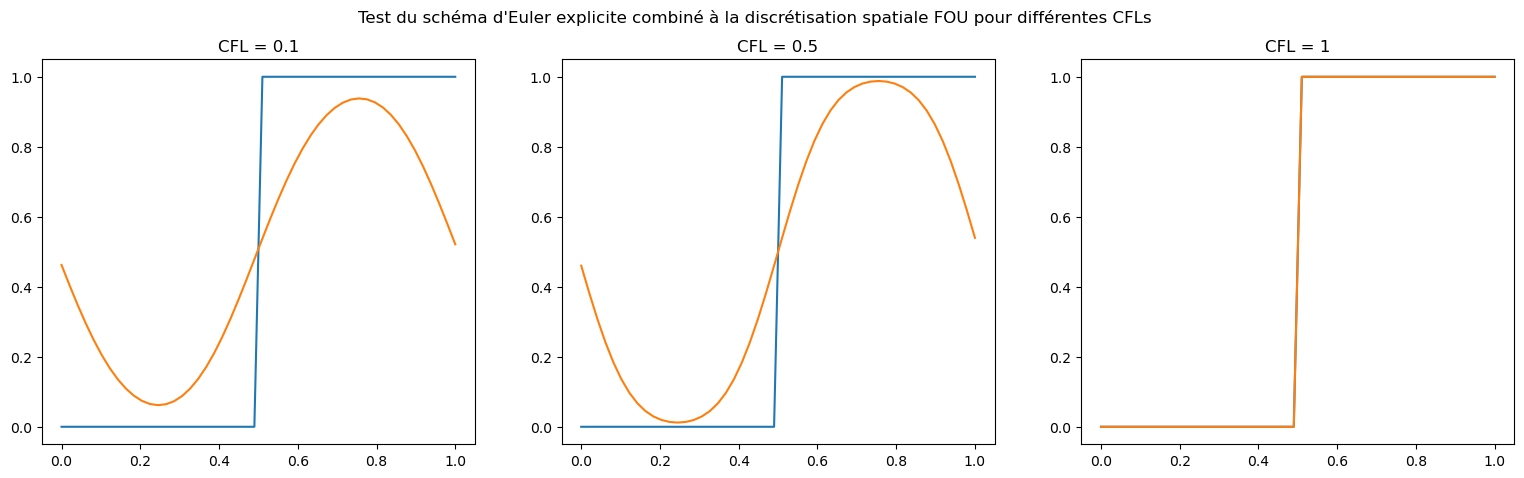

In [98]:
plt.figure(figsize=(19, 5))

for k in range(len(p_liste)) :
    grille_temps_espace_FOUEE = np.zeros((m,p_liste[k] + 1))
    grille_temps_espace_FOUEE[:,0] = u0
    for n in range(1,p_liste[k] + 1) :
        for i in range(m) :
            grille_temps_espace_FOUEE[i,n] = FOU_EE_u_i_nplus1(None, grille_temps_espace_FOUEE[i,n - 1], grille_temps_espace_FOUEE[i - 1,n - 1], None, C_liste[k])

    plt.suptitle("Test du schéma d'Euler explicite combiné à la discrétisation spatiale FOU pour différentes CFLs")
    plt.subplot(1,len(p_liste),k + 1)

    plt.plot(abscisse, grille_temps_espace_FOUEE[:,0])
    plt.plot(abscisse, grille_temps_espace_FOUEE[:,-1])
    plt.title("CFL = " + str(C_liste[k]))

Pour le schéma d'Euler explicite combiné à la discrétisation spatiale FOU, le fonctionnement est optimal à $\text{CFL} = 1$. Dans les cas des $\text{CFL}$ égales à $0.1$ et $0.5$, le schéma semble agir comme un passe-bas, puisqu'il transforme le créneau en une sinusoïde.

##### __1.2.2. UPO2VF__

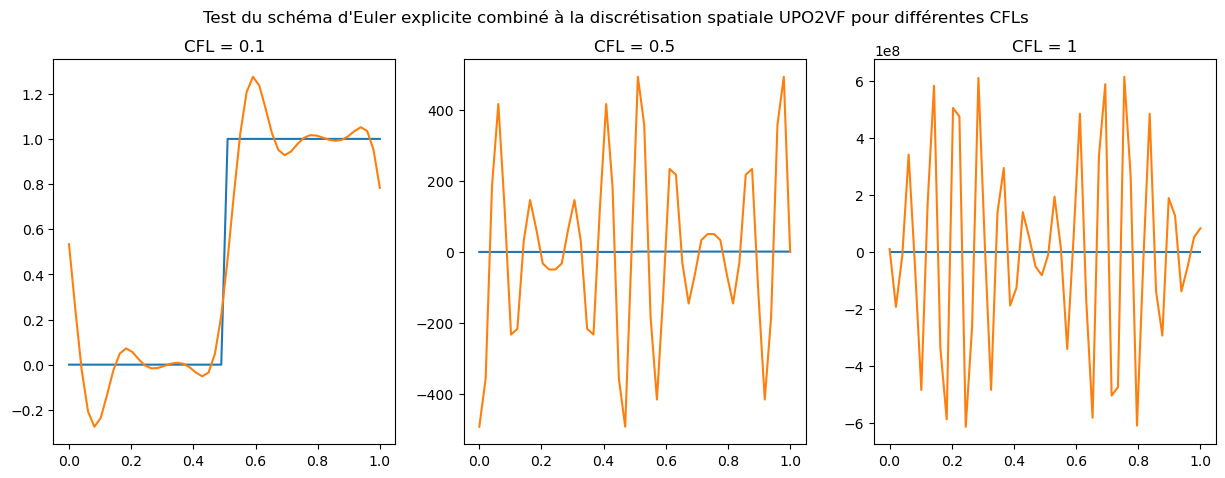

In [99]:
plt.figure(figsize=(15, 5))

for k in range(len(p_liste)) :
    grille_temps_espace_UPO2VF = np.zeros((m,p_liste[k]))
    grille_temps_espace_UPO2VF[:,0] = u0
    for n in range(1,p_liste[k]) :
        for i in range(m) :
            grille_temps_espace_UPO2VF[i,n] = UPO2VF_EE_u_i_nplus1(grille_temps_espace_UPO2VF[(i + 1)%m,n - 1], grille_temps_espace_UPO2VF[i,n - 1], grille_temps_espace_UPO2VF[i - 1,n - 1], grille_temps_espace_UPO2VF[i - 2,n - 1], C_liste[k])

    plt.suptitle("Test du schéma d'Euler explicite combiné à la discrétisation spatiale UPO2VF pour différentes CFLs")
    plt.subplot(1,len(p_liste),k + 1)

    plt.plot(abscisse, grille_temps_espace_UPO2VF[:,0])
    plt.plot(abscisse, grille_temps_espace_UPO2VF[:,-1])
    plt.title("CFL = " + str(C_liste[k]))

En revanche, la solution obtenue avec le schéma d'Euler explicite combiné à la discrétisation spatiale UPO2VF est beaucoup moins précise (notamment pour les $\text{CFLs 0.5 et } 1$). Le schéma n'est alors pas stable. À $\text{CFL} = 0.1$, la résolution suit grossièrement les variations de la courbe.

### __2. Schéma de Runge Kutta explicite d'ordre 2__

In [100]:
# Note : Ces deux fonctions avaient été implémentées dans le but de créer une procédure générique aux deux discrétisations spatiales dans le
# cas du schéma de Runge-Kutta, ce qui n'a finalement pas été fait.

def du_FOU(rien, u_i, uimoinsun, rien2):
    return -(a/deltax)*(u_i - uimoinsun)

def du_UPO2VF(u_iplusun, u_i, u_imoinsun, u_imoinsdeux):
    return -(a/(4*deltax))*(u_iplusun + 3*u_i - 5*u_imoinsun + u_imoinsdeux)

In [101]:
# Note : cette fonction est normalement générique pour les différents schémas que l'on a implémentés, mais ne fonctionne pas pour le schéma UPO2VF 
# pour des raisons qu'ils m'ont échappé pendant mes tests. On ne l'utilisera donc que pour le schéma FOU.

def RKexpl2_schema(U_n, schema, dt):
    U_etoile = np.zeros(np.size(U_n,0))
    for i in range(np.size(U_n,0)) :
        dU_etoile = schema(U_n[(i + 1)%np.size(U_n,0)], U_n[i], U_n[i - 1], U_n[i - 2])
        U_etoile[i] = U_n[i] + dt*dU_etoile
    U_nplusun = np.zeros(np.size(U_n,0))
    for i in range(np.size(U_n,0)) :
        dU = 0.5*schema(U_n[(i + 1)%np.size(U_n,0)], U_etoile[i], U_etoile[i - 1], U_n[i - 2]) + 0.5*schema(U_n[(i + 1)%np.size(U_n,0)], U_n[i], U_n[i - 1], U_n[i - 2])
        U_nplusun[i] = U_n[i] + dt*dU
    return U_nplusun

#### __2.1. FOU-EE__

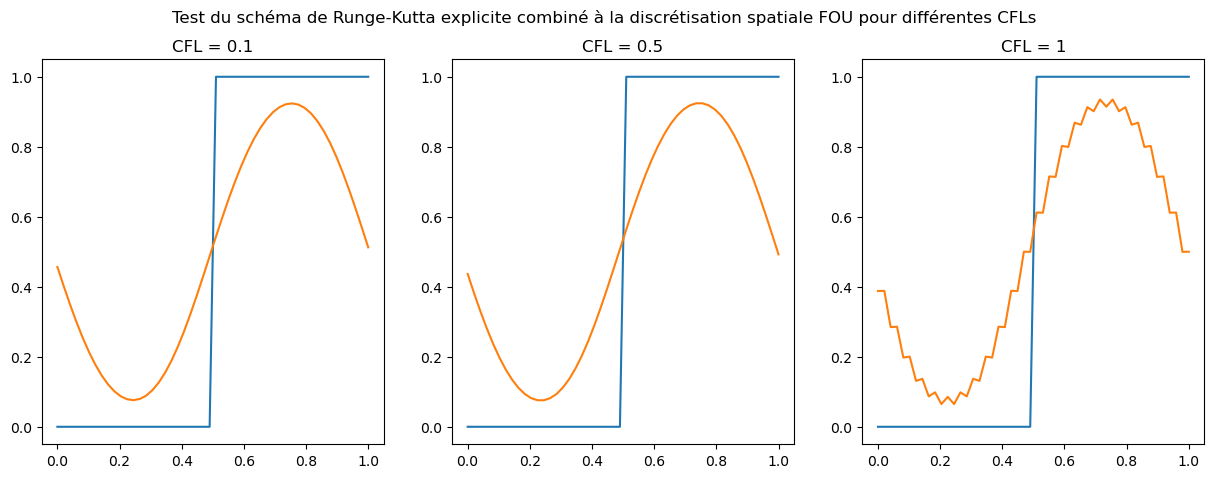

In [102]:
plt.figure(figsize=(15, 5))

for k in range(len(p_liste)) :
    grille_temps_espace_RKexpl2 = np.zeros((m,p_liste[k]))
    grille_temps_espace_RKexpl2[:,0] = np.array(u0)
    for n in range(1,p_liste[k]) :
        #for i in range(m) :
        grille_temps_espace_RKexpl2[:,n] = RKexpl2_schema(grille_temps_espace_RKexpl2[:,n-1], du_FOU, deltaT_liste[k])

    plt.suptitle("Test du schéma de Runge-Kutta explicite combiné à la discrétisation spatiale FOU pour différentes CFLs")
    plt.subplot(1,len(p_liste),k + 1)

    plt.plot(abscisse, grille_temps_espace_RKexpl2[:,0])
    plt.plot(abscisse, grille_temps_espace_RKexpl2[:,-1])
    plt.title("CFL = " + str(C_liste[k]))

Le schéma de Runge-Kutta explicite combiné au schéma de discrétisation FOU "transforme" le créneau initial en une sinusoïde pour les $\text{CFLs}$ égales à $0.1$ et $0.5$. Il agit alors comme un filtre passe-bas. 
Cependant, à $\text{CFL} = 1$, on constate que la sinusoïde devient "crantée". On est à la limite de stabilité.

#### __2.2. UPO2VF__

In [103]:
def RK2expl_UPO2VF(U_0, C, dt):
    grille = np.zeros((np.size(U_0,0),int(T/dt)))
    #grille[:,0] = np.array(u0)
    grille[:,0] = U_0
    for n in range(1,int(T/dt)) :
        #dU_etoile = du_FOU(C, rien, u_i, uimoinsun, rien2)
        U_etoile = np.zeros(np.size(U_0,0))
        for i in range(np.size(U_0,0)) :
            dU_etoile = -(C/4)*(grille[(i+1)%np.size(U_0,0),n-1] + 3*grille[i,n-1] - 5*grille[i-1,n-1] + grille[i-2,n-1])
            U_etoile[i] = grille[i,n-1] + dU_etoile
        U_nplusun = np.zeros(np.size(U_0,0))
        for i in range(np.size(U_0,0)) :
            dU = (-0.5)*(C/4)*(U_etoile[(i+1)%np.size(U_0,0)] + 3*U_etoile[i] - 5*U_etoile[i-1] + U_etoile[i-2]) - (0.5)*(C/4)*(grille[(i+1)%np.size(U_0,0),n-1] + 3*grille[i,n-1] - 5*grille[i-1,n-1] + grille[i-2,n-1])
            U_nplusun[i] = grille[i,n-1] + dU
        grille[:,n] = U_nplusun
    return grille

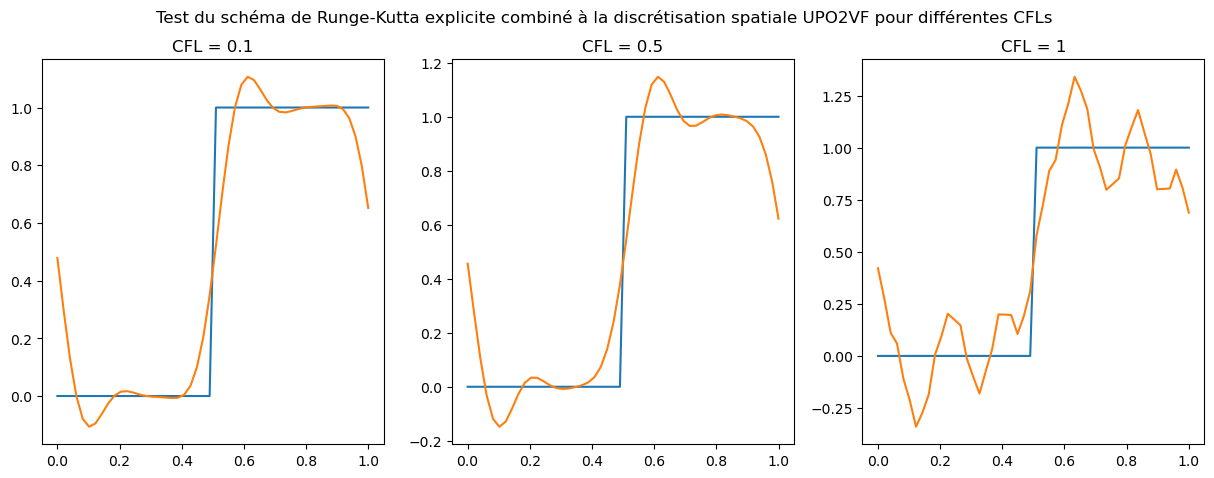

In [104]:
U_0 = np.array(u0)


plt.figure(figsize=(15, 5))

for k in range(len(p_liste)) :
    grille_temps_espace_UPO2VF = RK2expl_UPO2VF(U_0, C_liste[k], deltaT_liste[k])

    plt.suptitle("Test du schéma de Runge-Kutta explicite combiné à la discrétisation spatiale UPO2VF pour différentes CFLs")
    plt.subplot(1,len(p_liste),k + 1)

    plt.plot(abscisse, grille_temps_espace_UPO2VF[:,0])
    plt.plot(abscisse, grille_temps_espace_UPO2VF[:,-1])
    plt.title("CFL = " + str(C_liste[k]))

Le schéma de Runge-Kutta explicite combiné au schéma de discrétisation UPO2VF suit plutôt correctement la courbe du créneau aux $\text{CFLs}$ égales à $0.1$ et $0.5$. On remarque cependant encore une fois qu'à $\text{CFL} = 1$ la solution devient assez "vacillante".

### **3. Schéma d'Euler implicite**

#### **3.1. FOU-IE**

##### **Écriture du schéma implicite FOU-IE :**

Les étapes de construction du schéma étant les mêmes que celle du schéma implicite UPO2VF-IE, on ne va pas réécrire celles pour le schéma implicite FOU-IE (dont le résultat paraît au passage dans le cours d'intégration temporelle). Pour voir le raisonnement, aller section **3.2**.

On implémente ci-dessous le schéma de Runge-Kutta combiné à la discrétisation spatiale FOU.

In [105]:
C_liste_EI = [0.1, 0.5, 1, 10, 20]

deltaT_liste_EI = [C_liste_EI[i]*deltax/a for i in range(len(C_liste_EI))]
p_liste_EI = [int(T/deltaT_liste_EI[i]) for i in range(len(deltaT_liste_EI))]

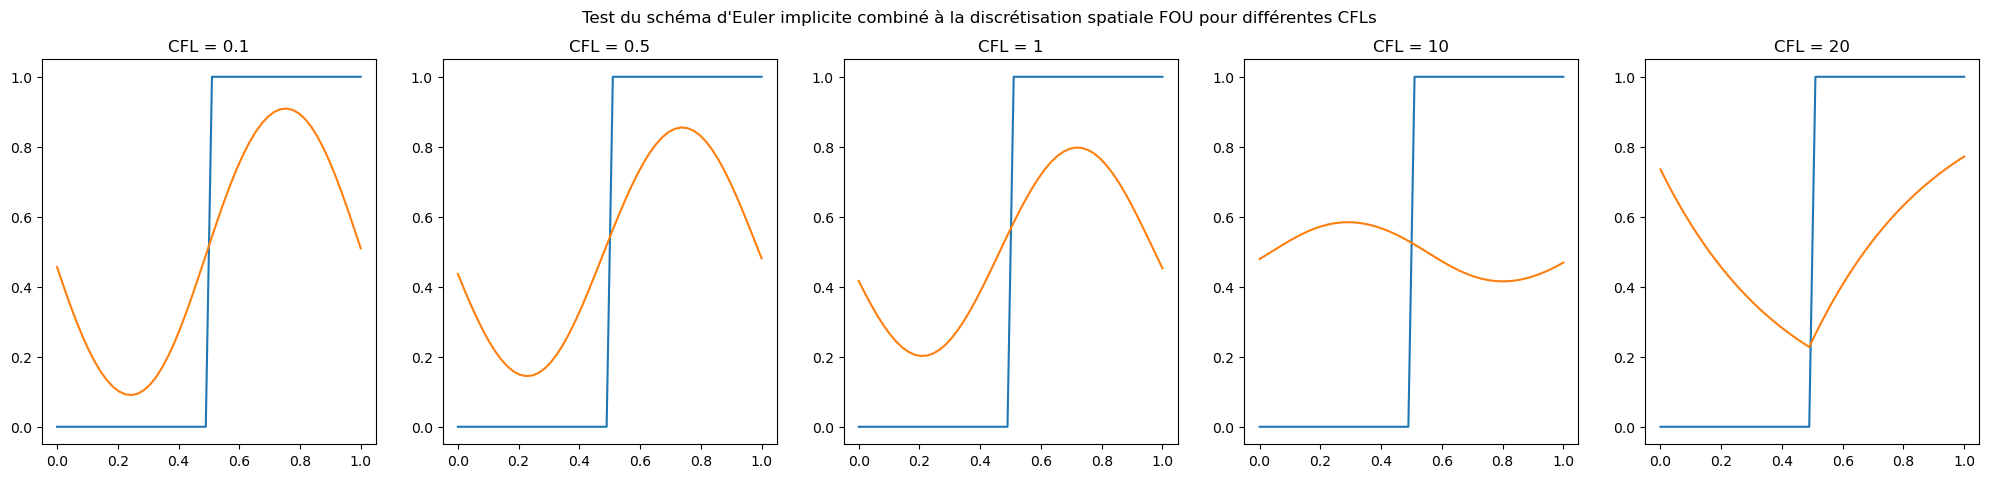

In [106]:
plt.figure(figsize=(25, 5))

for k in range(len(p_liste_EI)) :
    A_FOUEI = np.zeros((m,m))
    grille_FOUEI = np.zeros((m,p_liste_EI[k]))
    grille_FOUEI[:,0] = np.array(u0)
    for i in range(m):
        A_FOUEI[i,i-1] = - C_liste_EI[k]
        A_FOUEI[i,i] = 1 + C_liste_EI[k]
    inverse_A_FOUEI = np.linalg.inv(A_FOUEI)
    for i in range(p_liste_EI[k]-1):
        grille_FOUEI[:,i+1] = np.matmul(inverse_A_FOUEI,grille_FOUEI[:,i])
        
    plt.suptitle("Test du schéma d'Euler implicite combiné à la discrétisation spatiale FOU pour différentes CFLs")
    plt.subplot(1,len(p_liste_EI),k + 1)

    plt.plot(abscisse, grille_FOUEI[:,0])
    plt.plot(abscisse, grille_FOUEI[:,-1])
    plt.title("CFL = " + str(C_liste_EI[k]))
    

Le schéma d'Euler implicite combiné à la discrétisation spatiale FOU agit lui aussi comme un filtre passe-bas aux $\text{CFLs}$ égales à $0.1$, $0.5$ et $1$. On peut encore percevoir une sinusoïde à $\text{CFL} = 10$, mais celle-ci est déphasée et fortement atténuée. À $\text{CFL} = 20$, la résolution ne semble plus avoir de réel sens (on ne voit plus la forme initiale de créneau).

Quelque soit la valeur du $\text{CFL}$, on remarque que la solution "n'explose" jamais. Cela s'explique par le fait que le schéma décentré amont associé à une intégration implicite est inconditionnellement stable (car le facteur d'amplification est inférieur à 1 en module).

#### **UPO2VF-IE:**

##### **Écriture du schéma implicite UPO2VF-IE :**

Rappel du schéma explicite UPO2VF-EE :

$$
u_{i}^{n+1} = u_{i}^{n} - \cfrac{\mathcal{C}}{4}\displaystyle\left(u_{i+1}^{n} + 3u_{i}^{n} - 5u_{i-1}^{n} + u_{i-2}^{n}\right)
$$

$$
~
$$

On en déduit le schéma implicite UPO2VF-IE :

$$
u_{i}^{n+1} = u_{i}^{n} - \cfrac{\mathcal{C}}{4}\displaystyle\left(u_{i+1}^{n+1} + 3u_{i}^{n+1} - 5u_{i-1}^{n+1} + u_{i-2}^{n+1}\right)
$$

$$
~
$$

Ainsi, on a en isolant $u_i^n$ :

$$
\frac{\mathcal{C}}{4} \, u_{i+1}^{n+1} + \displaystyle\left(1 + \frac{\mathcal{3C}}{4}\right)u_{i}^{n+1} - \frac{\mathcal{5C}}{4} \, u_{i-1}^{n+1} + \frac{\mathcal{C}}{4} \, u_{i-2}^{n+1} = u_i^n
$$

$$
~
$$

Cela se traduit par le système matriciel suivant :

$$
\underbrace{
\begin{pmatrix}
1 + \frac{\mathcal{3C}}{4} & \frac{\mathcal{C}}{4} & 0 & \cdots & 0 & \frac{\mathcal{C}}{4} & - \frac{\mathcal{5C}}{4} \\
\\
\\
 & & \ddots & \ddots & \ddots & & \\
\\
\\
\frac{\mathcal{C}}{4} & 0 & \cdots & 0 & \frac{\mathcal{C}}{4}& -\frac{\mathcal{5C}}{4} & 1 + \frac{\mathcal{3C}}{4} \\
\end{pmatrix}
}_{:= A ~ \in ~ \mathcal{M}_m(\mathbb{R})}


\begin{pmatrix}
u_1 \\
\\
\\
 \vdots \\
\\
\\
u_m \\
\end{pmatrix}^{n+1}

=

~~~

\begin{pmatrix}
u_1 \\
\\
\\
 \vdots \\
\\
\\
u_m \\
\end{pmatrix}^n
$$

D'où :

$$
~
$$

$$
A^{-1}U^n = U^{n+1}
$$

$$
~
$$

Ce schéma est implémenté ci-dessous.

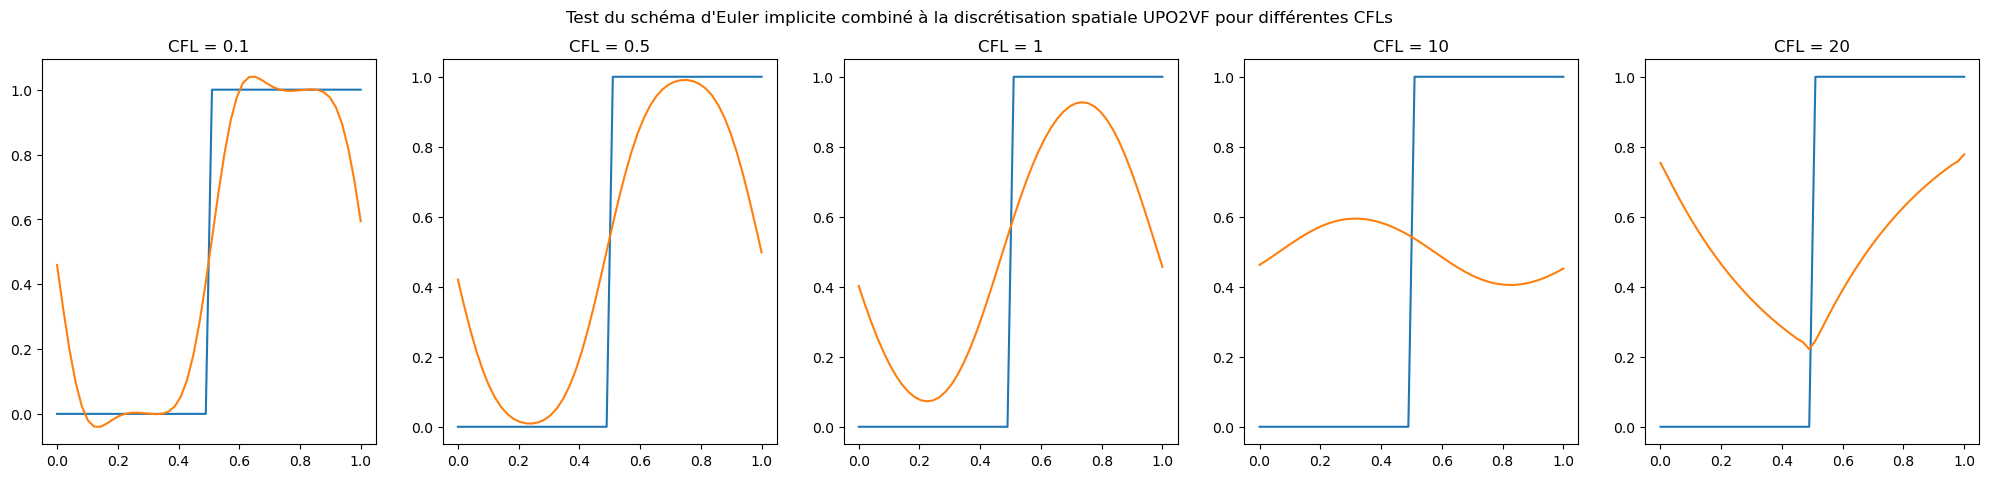

In [107]:
plt.figure(figsize=(25, 5))

for k in range(len(p_liste_EI)) :
    A_UPO2VFEI = np.zeros((m,m))
    grille_UPO2VFEI = np.zeros((m,p_liste_EI[k]))
    grille_UPO2VFEI[:,0] = np.array(u0)
    for i in range(m):
        A_UPO2VFEI[i,i-2] = C_liste_EI[k]/4
        A_UPO2VFEI[i,i-1] = - 5*C_liste_EI[k]/4
        A_UPO2VFEI[i,i] = 1 + 3*C_liste_EI[k]/4
        A_UPO2VFEI[i,(i+1)%m] = C_liste_EI[k]/4
    inverse_A_UPO2VFEI = np.linalg.inv(A_UPO2VFEI)
    for i in range(p_liste_EI[k]-1):
        grille_UPO2VFEI[:,i+1] = np.matmul(inverse_A_UPO2VFEI,grille_UPO2VFEI[:,i])
    
    plt.suptitle("Test du schéma d'Euler implicite combiné à la discrétisation spatiale UPO2VF pour différentes CFLs")
    plt.subplot(1,len(p_liste_EI),k + 1)

    plt.plot(abscisse, grille_UPO2VFEI[:,0])
    plt.plot(abscisse, grille_UPO2VFEI[:,-1])
    plt.title("CFL = " + str(C_liste_EI[k]))

Dans le cas du schéma d'Euler implicite combiné au schéma de discrétisation spatiale UPO2VF, le résultat à $\text{CFL} = 0.1$ est assez satisfaisant, dans le sens où il suit plutôt fidèlement le créneau. Pour les autres $\text{CFLs}$, les résulats sont semblables à ce que l'on pouvait avoir pour FOU avec le même schéma (avec un peu plus d'amplitude aux $\text{CFLs } 0.5 \text{ et } 1$).

En fait, en faisant le calcul, on doit retrouver un facteur d'amplification inférieur à 1, ce qui expliquerait alors de nouveau pourquoi les solutions "n'explose" pas.

En effet, en écrivant, $u_i^n = A^ne^{ji\phi}$, on trouve :

$$
A^{n+1} \underbrace{\displaystyle\left(1 + \cfrac{\mathcal{C}}{4}\displaystyle\left(e^{j\phi} + 3 - 5e^{-j\phi} + e^{-2j\phi}\right)\right)}_{\cfrac{1}{\mathcal{G}}} = A^n
$$

Il faut ensuite démontrer que $\cfrac{1}{\mathcal{G}} \geq 1$.